<a name = "inicio"></a>

1. [Introducción](#Introducción)
1. [Base teórica](#Base-teórica)
    1. [Carga y transformación de datos](#Carga-y-transformación-de-datos)
    1. [Tipos de datos temporales en pandas](#Tipos-de-datos-temporales-en-pandas)
    1. [Herramientas de pandas](#Herramientas-de-pandas)
        1. [Remuestreado](#Remuestreado)
        1. [Interpolado](#Interpolado)
        1. [Truncado](#Truncado)
        1. [Desplazamientos](#Desplazamientos)
        1. [Diferencias](#Diferencias)
    1. [Conceptos matemáticos](#Conceptos-matemáticos)
        1. [Correlación](#Correlación)
        1. [Autocorrelación](#Autocorrelación)
        1. [La función de autocorrelación (ACF)](#La-función-de-autocorrelación-(ACF))
        1. [La función de autocorrelación parcial (PACF)](#La-función-de-autocorrelación-parcial-(PACF))
        1. [Ruido blanco](#Ruido-blanco)
1. [Modelos ARIMA](#Modelos-ARIMA)
    1. [El modelo Autorregresivo (AR)](#El-modelo-Autorregresivo-(AR))
        1. [AIC y BIC](#AIC-y-BIC)
        1. [Predicción](#Predicción)
    1. [El modelo Moving Average (MA)](#El-modelo-Moving-Average-(MA))
    1. [El modelo ARMA](#El-modelo-ARMA)
    1. [Series estacionarias (stationary series)](#Series-estacionarias-(stationary-series))
        1. [El test de Dicky-Fuller Aumentado](#El-test-de-Dicky-Fuller-Aumentado)
        1. [Transformaciones](#Transformaciones)
        1. [Integración](#Integración)
    1. [Perfiles de los datos AR y MA](#Perfiles-de-los-datos-AR-y-MA)
        1. [Datos AR](#Datos-AR)
        1. [Datos MA](#Datos-MA)
    1. [El modelo ARIMA](#El-modelo-ARIMA)
    1. [El modelo ARMAX](#El-modelo-ARMAX)
    1. [Búsqueda en bucle del mejor modelo](#Búsqueda-en-bucle-del-mejor-modelo)
    1. [Descomposición de una serie estacional](#Descomposición-de-una-serie-estacional)
    1. [El modelo SARIMA](#El-modelo-SARIMA)
    1. [Diagnóstico del modelo](#Diagnóstico-del-modelo)
    1. [Automatización del cálculo de los órdenes óptimos](#Automatización-del-cálculo-de-los-órdenes-óptimos)

# Introducción
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

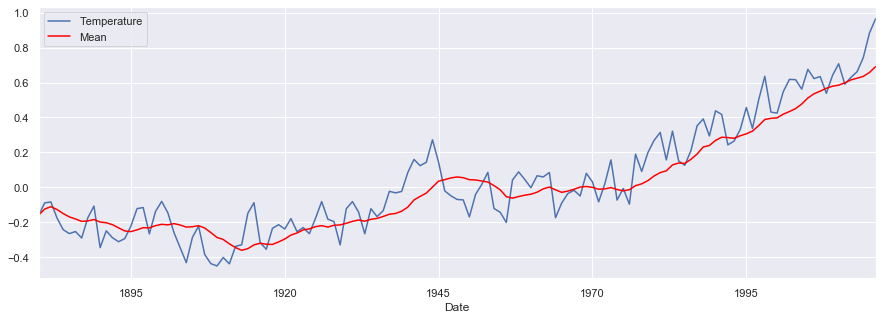

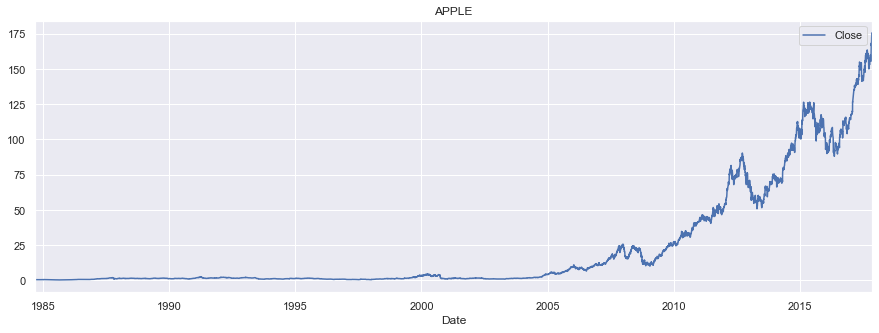

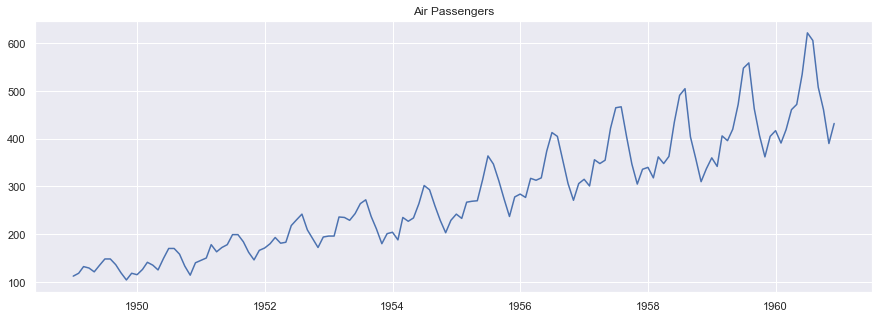

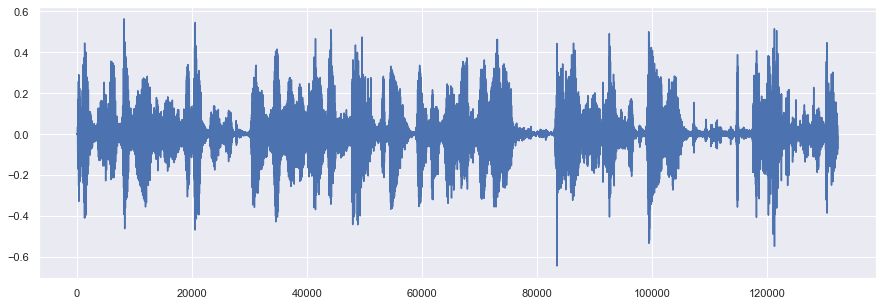

# Base teórica
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

## Carga y transformación de datos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Comencemos cargando un conjunto de datos con información temporal: el dataset <i>candy</i> con información sobre la producción de caramelos en los Estados Unidos.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
pd.options.display.max_columns=50

In [13]:
plt.rcParams["figure.figsize"] = (15,5)

In [14]:
candy=pd.read_csv('candy_production.csv')

In [15]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
observation_date    548 non-null object
IPG3113N            548 non-null float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


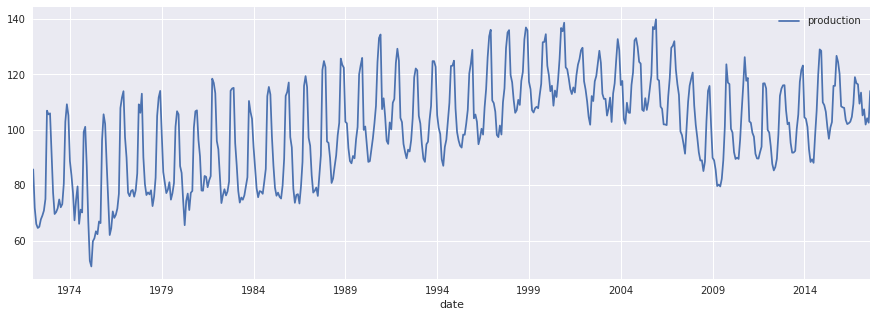

In [36]:
candy=pd.read_csv('candy_production.csv',parse_dates=['observation_date'])
candy.rename({'observation_date':'date','IPG3113N':'production'},axis=1,inplace=True)
candy.set_index('date',inplace=True)
candy=candy.to_period()       #Transforma los datos de 'fechas exactas' a 'periodos'
candy.plot()                  #Se trata del método implicito de pandas para hacer grafos
plt.show()

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Carga y muestra en pantalla los datos relativos al valor bursátil de IBM (dataset "ibm.txt"). Quédate apenas con el campo "Close" (además del campo que contiene la fecha, por supuesto).</div>
</div>

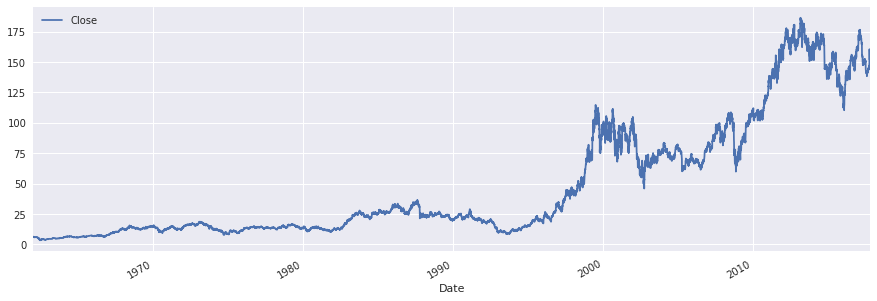

In [51]:
ibm=pd.read_csv('ibm.txt',parse_dates=['Date'],usecols=['Date','Close'],index_col=['Date'])
ibm.plot()
plt.show()

## Tipos de datos temporales en pandas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

#### La clase Timestamp

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

In [64]:
pd.Timestamp("1/2/2019")

Timestamp('2019-01-02 00:00:00')

In [53]:
pd.Timestamp(2019, 2, 1)

Timestamp('2019-02-01 00:00:00')

In [54]:
pd.Timestamp(2019, 2, 1, 16, 17, 22)

Timestamp('2019-02-01 16:17:22')

In [55]:
pd.Timestamp(year = 2019, month = 10, day = 28, hour = 16, minute = 56, second = 12,
                 microsecond = 13, nanosecond = 16)

Timestamp('2019-10-28 16:56:12.000013016')

In [56]:
from datetime import date

In [57]:
pd.Timestamp(date(2019, 8, 26))

Timestamp('2019-08-26 00:00:00')

In [58]:
d = pd.Timestamp(year = 2019, month = 10, day = 28, hour = 16, minute = 56, second = 12,
                 microsecond = 13, nanosecond = 16)
d

Timestamp('2019-10-28 16:56:12.000013016')

In [59]:
print(d.year)
print(d.month)
print(d.day)
print(d.hour)
print(d.minute)
print(d.second)
print(d.microsecond)
print(d.nanosecond)

2019
10
28
16
56
12
13
16


In [60]:
print(d.quarter)
print(d.week)
print(d.dayofweek)
print(d.dayofyear)
print(d.day_name())
print(d.month_name())

4
44
0
301
Monday
October


#### La clase Period

Por defecto Period se interpretará como mes, a no ser que se le diga lo contrario

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Period.html

In [65]:
p = pd.Period("2017-01")   
p

Period('2017-01', 'M')

In [66]:
p.start_time

Timestamp('2017-01-01 00:00:00')

In [67]:
p.end_time

Timestamp('2017-01-31 23:59:59.999999999')

In [69]:
p.asfreq("D")      #Por defecto coge el día final pero se podría cambiar

Period('2017-01-31', 'D')

In [70]:
p = pd.Period("2017-05-23")
p.asfreq("M")

Period('2017-05', 'M')

In [71]:
p.asfreq("D")

Period('2017-05-23', 'D')

In [72]:
pd.Period("2018-05").to_timestamp()

Timestamp('2018-05-01 00:00:00')

In [73]:
p = pd.Period("2017-05-23")
p + 2

Period('2017-05-25', 'D')

In [74]:
p = pd.Period("2017-05-23")
q = pd.Period("2017-05-28")
q - p

<5 * Days>

#### La clase Timedelta

Se trata de la diferencia entre 2 timestamps

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html

In [75]:
d = pd.Timedelta(weeks = 1, days = 2, hours = 3, minutes = 4, seconds = 5, milliseconds = 6,
                 microseconds = 7, nanoseconds = 8)
d

Timedelta('9 days 03:04:05.006007')

In [79]:
# Estos son los únicos atributos a los que se puede acudir. d.minutes daría error por ejemplo
print(d.days)
print(d.seconds)
print(d.microseconds)
print(d.nanoseconds)

9
11045
6007
8


In [80]:
pd.Timedelta("1 day 1 second")

Timedelta('1 days 00:00:01')

In [81]:
pd.Timedelta("1 day 1 millisecond")

Timedelta('1 days 00:00:00.001000')

In [82]:
pd.Timedelta("1 hour")

Timedelta('0 days 01:00:00')

In [83]:
pd.Timedelta("2 hour")

Timedelta('0 days 02:00:00')

In [84]:
pd.Timedelta("2 hours")

Timedelta('0 days 02:00:00')

In [85]:
pd.Timedelta("2.3 hours")

Timedelta('0 days 02:18:00')

In [86]:
pd.Timestamp(2019, 8, 25, 18, 49) + pd.Timedelta("3 hours")

Timestamp('2019-08-25 21:49:00')

#### La clase date_range

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html

Habrá que darle 3 de las 4 siguientes opciones:
- start
- end
- periods
- freq

In [87]:
pd.date_range("August, 28 2018", periods = 5, freq = "M")

DatetimeIndex(['2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [88]:
pd.date_range("August, 28 2018", periods = 5, freq = "D")

DatetimeIndex(['2018-08-28', '2018-08-29', '2018-08-30', '2018-08-31',
               '2018-09-01'],
              dtype='datetime64[ns]', freq='D')

In [89]:
pd.date_range(start = date(2019, 8, 13), end = date(2019, 9, 21), freq = "W")

DatetimeIndex(['2019-08-18', '2019-08-25', '2019-09-01', '2019-09-08',
               '2019-09-15'],
              dtype='datetime64[ns]', freq='W-SUN')

In [96]:
pd.date_range(start = date(2019, 8, 13), end = date(2019, 9, 21), freq = "W-MON")

DatetimeIndex(['2019-08-19', '2019-08-26', '2019-09-02', '2019-09-09',
               '2019-09-16'],
              dtype='datetime64[ns]', freq='W-MON')

In [97]:
pd.date_range(start = "2018-01-1", end = "2019-12-31", freq = "MS")  #MS = Month Start

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [98]:
from datetime import datetime

In [99]:
pd.date_range(start = datetime.today(), periods = 5, freq = "H")

DatetimeIndex(['2020-02-08 10:12:56.492158', '2020-02-08 11:12:56.492158',
               '2020-02-08 12:12:56.492158', '2020-02-08 13:12:56.492158',
               '2020-02-08 14:12:56.492158'],
              dtype='datetime64[ns]', freq='H')

In [100]:
pd.date_range(start = "2019-1-1", end = "2019-3-1", periods = 4)

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-20 16:00:00',
               '2019-02-09 08:00:00', '2019-03-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [101]:
pd.date_range(start = "2019-8-1", end = "2019-8-31", freq = "B")   #B = Business day (día laboral)

DatetimeIndex(['2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14', '2019-08-15', '2019-08-16',
               '2019-08-19', '2019-08-20', '2019-08-21', '2019-08-22',
               '2019-08-23', '2019-08-26', '2019-08-27', '2019-08-28',
               '2019-08-29', '2019-08-30'],
              dtype='datetime64[ns]', freq='B')

In [95]:
pd.date_range(start = "2019-8-1", end = "2019-8-31", freq = "B") + pd.Timedelta("3 hours")

DatetimeIndex(['2019-08-01 03:00:00', '2019-08-02 03:00:00',
               '2019-08-05 03:00:00', '2019-08-06 03:00:00',
               '2019-08-07 03:00:00', '2019-08-08 03:00:00',
               '2019-08-09 03:00:00', '2019-08-12 03:00:00',
               '2019-08-13 03:00:00', '2019-08-14 03:00:00',
               '2019-08-15 03:00:00', '2019-08-16 03:00:00',
               '2019-08-19 03:00:00', '2019-08-20 03:00:00',
               '2019-08-21 03:00:00', '2019-08-22 03:00:00',
               '2019-08-23 03:00:00', '2019-08-26 03:00:00',
               '2019-08-27 03:00:00', '2019-08-28 03:00:00',
               '2019-08-29 03:00:00', '2019-08-30 03:00:00'],
              dtype='datetime64[ns]', freq='B')

<div style="background:#0099cc;padding:20px;color:#ffffff">
    <strong>EJERCICIO</strong>
Crea un dataframe df con 12 fechas consecutivas (interpretadas como puntos en el tiempo) a partir del 1 de enero de 2019 en el índice y una columna "Value" con valores aleatorios:
</div>

In [120]:
fechas = pd.date_range(start='2019-12-1',periods=12, freq='D')
valores=np.random.randint(0,12,12)
df=pd.DataFrame({'value':valores},index=fechas)
df

,value
2019-12-01,1
2019-12-02,7
2019-12-03,8
2019-12-04,1
2019-12-05,1
2019-12-06,4
2019-12-07,7
2019-12-08,10
2019-12-09,4
2019-12-10,9


#### La clase period_range

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.period_range.html

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
Crea un dataframe df con 6 horas consecutivas (interpretadas como períodos) a partir de las 6 de la tarde del 11 de marzo de 2019 en el índice y una columna "Value" con valores aleatorios:
</div>

In [121]:
p = pd.period_range(start = "2019-1-1T15:0:0", periods = 12, freq = "H")
p

PeriodIndex(['2019-01-01 15:00', '2019-01-01 16:00', '2019-01-01 17:00',
             '2019-01-01 18:00', '2019-01-01 19:00', '2019-01-01 20:00',
             '2019-01-01 21:00', '2019-01-01 22:00', '2019-01-01 23:00',
             '2019-01-02 00:00', '2019-01-02 01:00', '2019-01-02 02:00'],
            dtype='period[H]', freq='H')

## Herramientas de pandas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

### Remuestreado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

Leamos el dataset *global_temperature_monthly.csv*. ¿Las muestras están distribuidas tal y como necesitamos?

In [130]:
temp=pd.read_csv('global_temperature_monthly.csv',parse_dates=['Date'],index_col='Date')

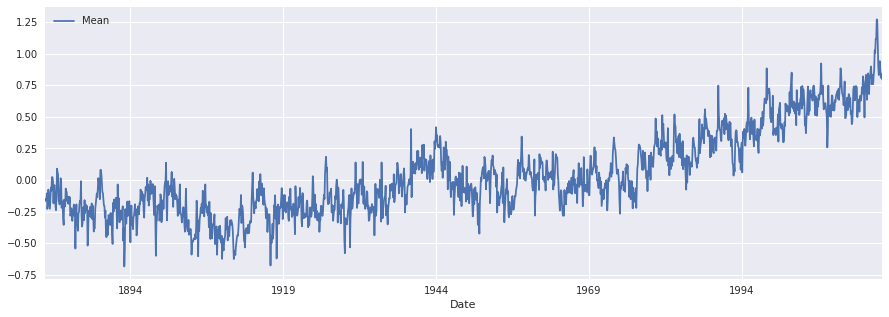

In [144]:
media_mensual=temp.resample('M').mean()
media_mensual.plot()

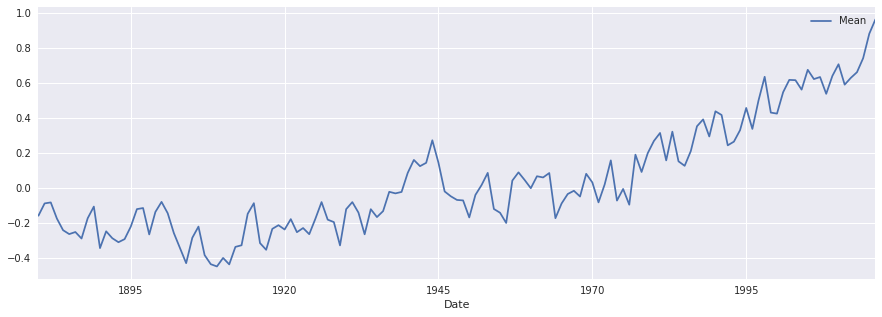

In [146]:
media_anual=temp.resample('A').mean()
media_anual.plot()

Esto es especialmente útil si las fechas no son periódicas, como ocurre en el dataset months.csv:

In [122]:
data = pd.read_csv("months.csv", parse_dates = ["date"], index_col = "date")
data

,value
date,
2019-01-04,8
2019-01-16,4
2019-03-02,9
2019-03-03,3
2019-03-11,4
2019-04-02,7
2019-06-06,3
2019-06-26,5
2019-07-18,1


In [147]:
data.resample('M').sum()

,value
date,
2019-01-31,12
2019-02-28,0
2019-03-31,16
2019-04-30,7
2019-05-31,0
2019-06-30,8
2019-07-31,7


### Interpolado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

Una herramienta muy útil es la que nos permite sustituir valores nulos por el resultado de interpolar los valores existentes, lo que puede ocurrir si aplicamos a un dataframe una frecuencia: df = df.asfreq("D"). Veámoslo en el dataset de days.csv

In [152]:
days = pd.read_csv("days.csv", parse_dates = ["date"], index_col = "date")
days

,value
date,
2019-01-01,8
2019-01-02,4
2019-01-04,9
2019-01-05,3
2019-01-08,4
2019-01-09,7


In [156]:
days = days.asfreq('D')
days

,value
date,
2019-01-01,8.0
2019-01-02,4.0
2019-01-03,NaN
2019-01-04,9.0
2019-01-05,3.0
2019-01-06,NaN
2019-01-07,NaN
2019-01-08,4.0
2019-01-09,7.0


In [157]:
days.interpolate(method='linear')    #hay muchos mas métodos

,value
date,
2019-01-01,8.000000
2019-01-02,4.000000
2019-01-03,6.500000
2019-01-04,9.000000
2019-01-05,3.000000
2019-01-06,3.333333
2019-01-07,3.666667
2019-01-08,4.000000
2019-01-09,7.000000


### Truncado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.truncate.html

Otro útil método es .truncate(), que nos permite eliminar los índices anteriores y/o posteriores a uno dado.

**IMPORTANTE**: El índice deberá estar ordenado.

Podemos aplicarlo a candy... tanto con períodos mensuales como anuales.

In [158]:
candy.head()

,production
date,
1972-01,85.6945
1972-02,71.8200
1972-03,66.0229
1972-04,64.5645
1972-05,65.0100


In [160]:
candy.truncate(before = '2000').head()

,production
date,
2000-01,123.1325
2000-02,119.7423
2000-03,113.9508
2000-04,115.9481
2000-05,108.7202


In [161]:
candy.truncate(before='2004',after='2009')

,production
date,
2004-01,116.1890
2004-02,117.6700
2004-03,103.9096
2004-04,102.2036
2004-05,109.8036
...,...
2008-09,103.2736
2008-10,114.0601
2008-11,115.8743


### Desplazamientos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El método .shift() aplicado a una serie o a un dataframe nos permite desplazarlo en una dirección (por defecto hacia abajo):

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [162]:
data = pd.DataFrame(np.random.randint(0, 10, 20).reshape(4, -1), columns = list("ABCDE"))
data

,A,B,C,D,E
0,5,9,7,9,9
1,4,7,4,6,8
2,5,4,7,3,0
3,8,0,1,2,8


In [165]:
data.shift(2)    #Moveriamos hacia abajo 2 veces la serie

,A,B,C,D,E
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,5.0,9.0,7.0,9.0,9.0
3,4.0,7.0,4.0,6.0,8.0


In [167]:
data.shift(-2)    #Moveriamos hacia arriba 2 veces la serie

,A,B,C,D,E
0,5.0,4.0,7.0,3.0,0.0
1,8.0,0.0,1.0,2.0,8.0
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN


In [168]:
data.shift(2,axis=1)    #Moveriamos hacia la derecha 2 veces la serie

,A,B,C,D,E
0,NaN,NaN,5.0,9.0,7.0
1,NaN,NaN,4.0,7.0,4.0
2,NaN,NaN,5.0,4.0,7.0
3,NaN,NaN,8.0,0.0,1.0


### Diferencias
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html

El método .diff() permite calcular la diferencia de las columnas o filas de un dataframe:

In [171]:
data

,A,B,C,D,E
0,5,9,7,9,9
1,4,7,4,6,8
2,5,4,7,3,0
3,8,0,1,2,8


In [173]:
data.diff()  #Calcula la diferencia entre el data y el data desplazado una hacia abajo por defecto

,A,B,C,D,E
0,NaN,NaN,NaN,NaN,NaN
1,-1.0,-2.0,-3.0,-3.0,-1.0
2,1.0,-3.0,3.0,-3.0,-8.0
3,3.0,-4.0,-6.0,-1.0,8.0


In [174]:
s = pd.Series([2, 5, 4, 7, 6, 1, 5, 3])
s

0    2
1    5
2    4
3    7
4    6
5    1
6    5
7    3
dtype: int64

In [175]:
s.diff()

0    NaN
1    3.0
2   -1.0
3    3.0
4   -1.0
5   -5.0
6    4.0
7   -2.0
dtype: float64

## Conceptos matemáticos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

### Correlación
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Alta correlación (positiva):

In [176]:
r = pd.Series([3.4, 8.9, 6.8, 0.6, 4.6, 8.4, 7.8, 1.3, 5.0 , 0.7])
s = pd.Series([6.4, 9.8, 8.8, 4.8, 6.9, 9.4, 7.8, 3.7, 7.7, 6.0 ])

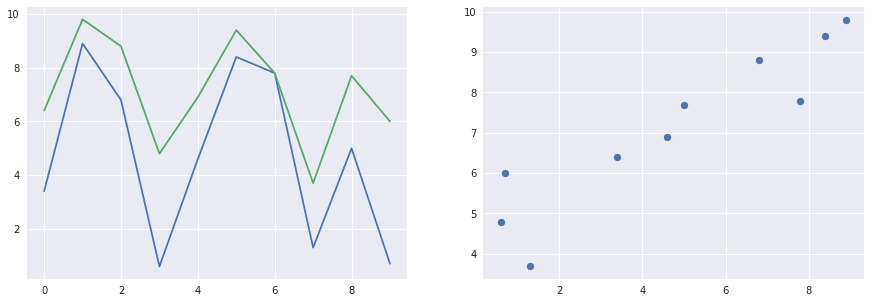

0.9215849991769304


In [180]:
fig,ax=plt.subplots(1,2)

ax[0].plot(r)
ax[0].plot(s)

ax[1].scatter(r,s)

plt.show()
print(r.corr(s))

Alta correlación (negativa):

In [182]:
r = pd.Series([7.5, 8.8, 8.2, 4.5, 5.5, 6.4, 9.8, 6.2, 4.5, 8.7])
s = pd.Series([4.4, 5.6, 6.1, 9.9, 8.3, 8.3, 2.2, 8.4, 7.4, 4.3])

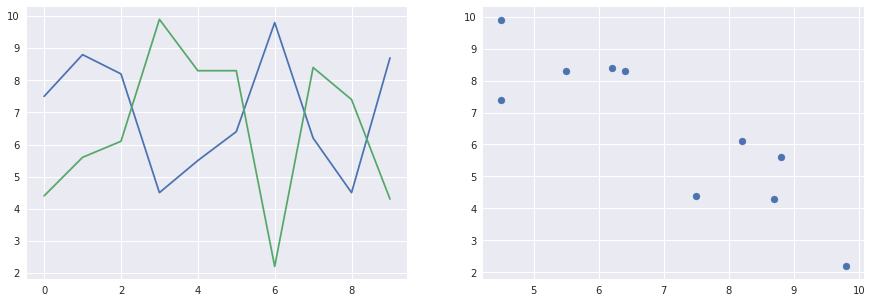

-0.8725229717753339


In [183]:
fig,ax=plt.subplots(1,2)

ax[0].plot(r)
ax[0].plot(s)

ax[1].scatter(r,s)

plt.show()
print(r.corr(s))

Baja correlación:

In [184]:
r = pd.Series([8.4, 5.3, 3.2, 9. , 1.2, 4.1, 7.3, 7.2, 2.8, 3.7])
s = pd.Series([6.3, 9. , 4.3, 5.5, 6.8, 9.6, 4.4, 1.6, 5.6, 0.5])

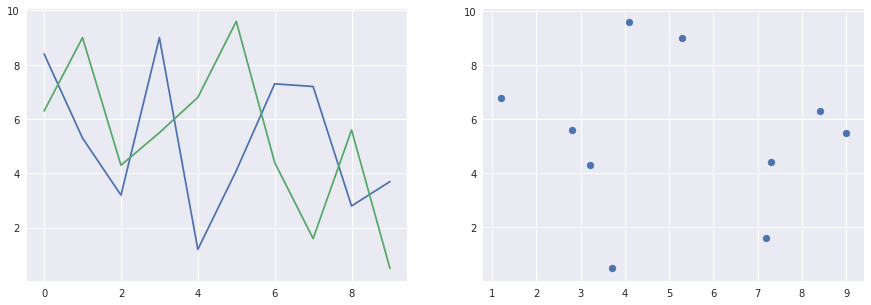

-0.10630510433176735


In [185]:
fig,ax=plt.subplots(1,2)

ax[0].plot(r)
ax[0].plot(s)

ax[1].scatter(r,s)

plt.show()
print(r.corr(s))

http://tylervigen.com/view_correlation?id=1703

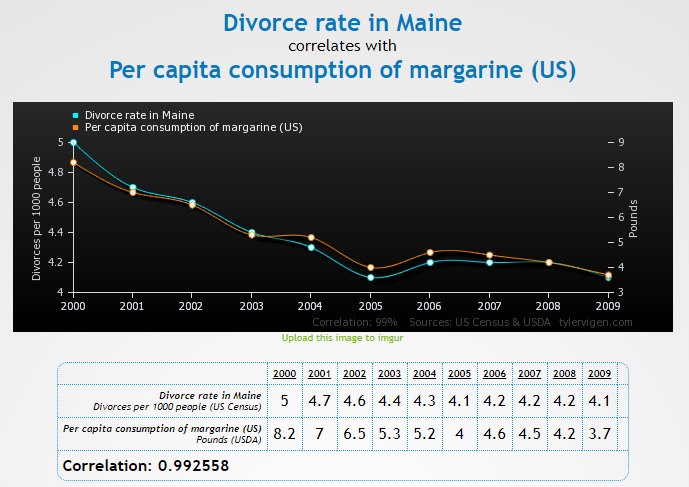

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra en una gráfica la evolución de los valores bursátiles de IBM y Apple, y calcula la correlación entre ellos. Quédate solo con la columna "Close" (además de la que contiene la etiqueta temporal).</div>
</div>

In [193]:
ibm=pd.read_csv('ibm.txt',parse_dates=['Date'],usecols=['Date','Close'],index_col=['Date'])

In [194]:
aapl=pd.read_csv('aapl.txt',parse_dates=['Date'],usecols=['Date','Close'],index_col=['Date'])

In [195]:
len(ibm),len(aapl)

(14059, 8364)

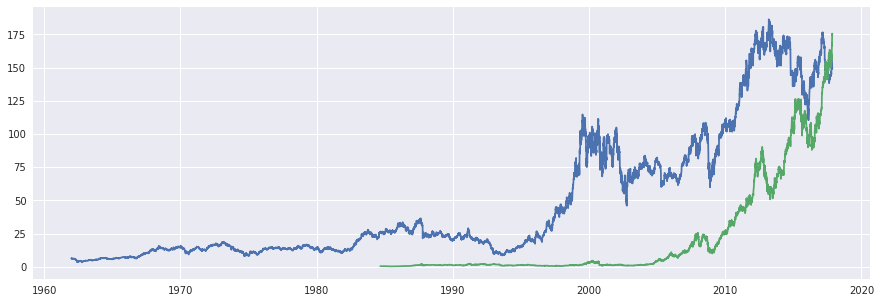

0.7963330127407168

In [201]:
plt.plot(ibm)
plt.plot(aapl)
plt.show()

ibm['Close'].corr(aapl['Close'])     #La correlación solo permite SERIES

### Autocorrelación
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Se trata de la correlación de una serie consigo misma habiendo sido desplazada X distancia ('lag')

In [202]:
s = pd.Series(np.random.randint(0, 5, (10, )))
s

0    2
1    4
2    1
3    2
4    3
5    3
6    2
7    0
8    1
9    2
dtype: int64

In [203]:
s.corr(s.shift(1))

0.08333333333333336

In [205]:
s.autocorr(1)    #El método implicito de pandas

0.08333333333333336

¿Qué tipo de series mostrarán autocorrelación alta para algún lag?

In [206]:
x = np.linspace(0, 12, 24)
y = np.sin(x)
y = pd.Series(y)

1.0


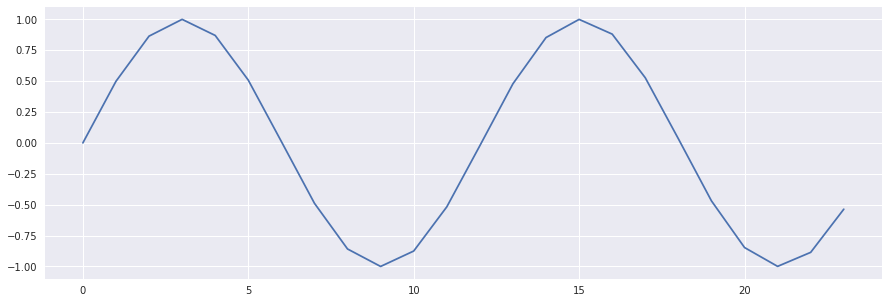

In [207]:
plt.plot(y);
print(y.corr(y))

-0.8400800103410611


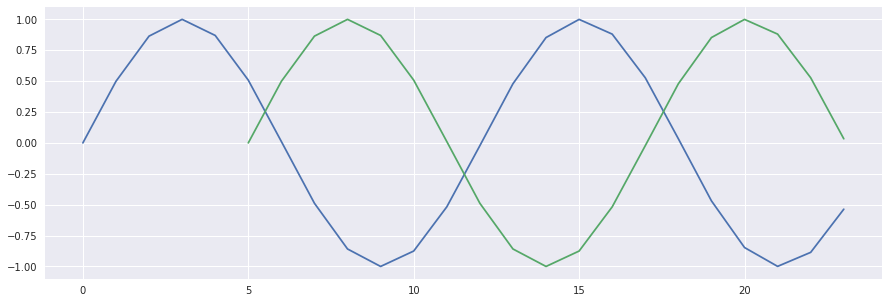

In [214]:
n=5
plt.plot(y);
plt.plot(y.shift(n))
print(y.autocorr(n))

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Calcula la autocorrelación de la función senoidal y para los lags entre 0 y 19</div>
</div>

In [217]:
for i in range(20):
    print(i,y.autocorr(i))

0 1.0
1 0.8769662829481312
2 0.5582079972438304
3 0.10295090073607362
4 -0.4156445200785021
5 -0.8400800103410611
6 -0.999932907269958
7 -0.8754213232665885
8 -0.5554622541938353
9 -0.10504434514224271
10 0.41287463084238285
11 0.8394041433021404
12 0.9997525833198959
13 0.8968791741912433
14 0.6497962146967481
15 0.32657217479330264
16 -0.09108626980054128
17 -0.631830220760804
18 -0.9982702377583391
19 -0.5889255730259966


### La función de autocorrelación (ACF)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Tanto en acf como en plot_acf deberemos usar el parámetro unbiased = True para evitar que influya el número limitado de muestras.

In [225]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [221]:
acf_results=acf(y,unbiased=True)
acf_results

array([ 1.        ,  0.90356254,  0.56950828,  0.08577032, -0.4206237 ,
       -0.81702267, -0.99993975, -0.92199644, -0.60398943, -0.12901963,
        0.37962086,  0.79083506,  0.99975258,  0.9544279 ,  0.66826273,
        0.21507171, -0.29164254, -0.72945374, -0.99945468, -1.05167003,
       -0.89672287, -0.60081893, -0.26565356,  0.00107954])

<BarContainer object of 24 artists>

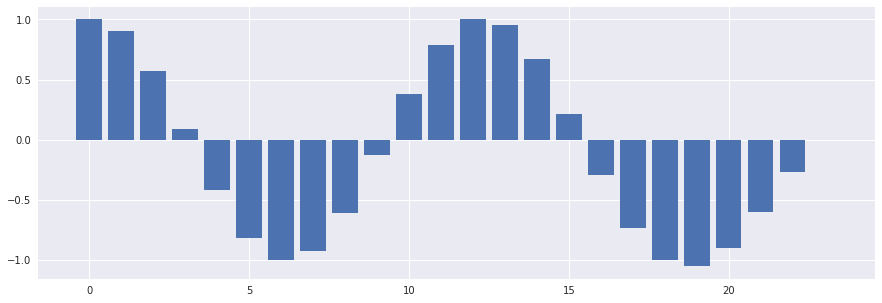

In [227]:
plt.bar(range(len(acf_results)),acf_results)

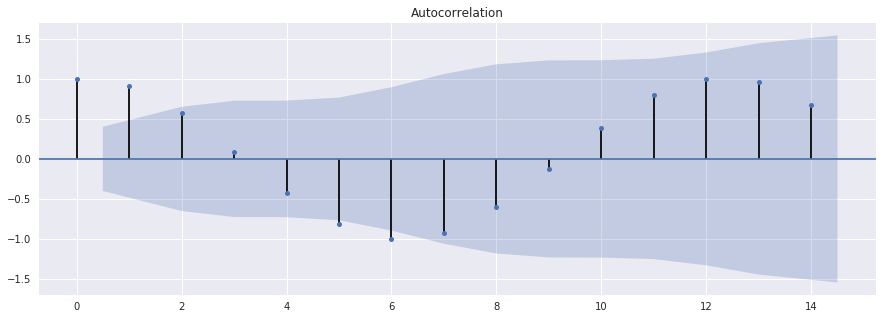

In [234]:
plot_acf(y,unbiased=True)     #La sombra es el intervalo de confianza para cada valor
plt.show()

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra en pantalla la función de autocorrelación de candy para los 50 primeros lags. Interpreta el resultado</div>
</div>

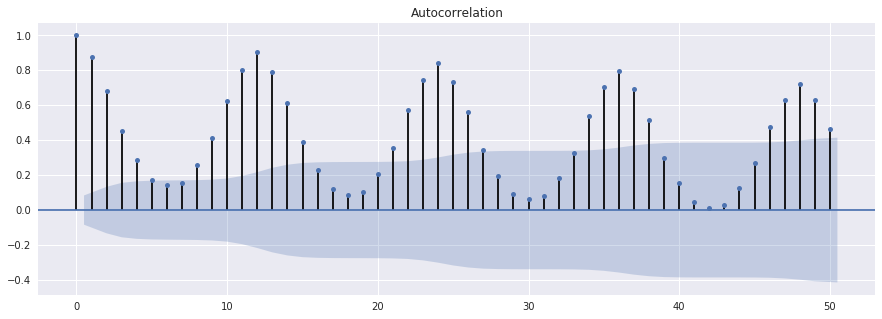

In [233]:
plot_acf(candy,lags=50)
plt.show()

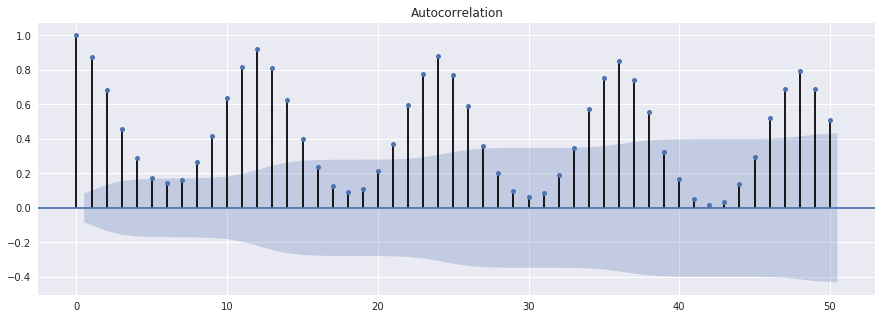

In [236]:
plot_acf(candy,lags=50,unbiased =True)
plt.show()

##### Se observa que, si no ponemos 'unbiased', como cada vez se utilizan menos datos, la autocorrelacion tiende a 0

### La función de autocorrelación parcial (PACF)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Esta función nos indica la influencia REAL que tiene cada lag en el lag actual. Es decir, cada lack se ve influenciado por el anterior, por lo que está algo 'sesgado'. Con pacf podemos ver cual es esta influencia que tiene cada lag.

Para evitar errores, podemos vernos obligados a especificar el método de cálculo: method = "ywm"

In [237]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

In [238]:
pacf(candy)

array([ 1.00000000e+00,  8.75606579e-01, -3.47644452e-01, -2.40146453e-01,
        2.27571526e-01,  7.33969929e-03,  1.15796036e-01,  8.53614997e-02,
        3.44682661e-01,  2.92129400e-01,  4.93277421e-01,  3.42629591e-01,
        3.40953995e-01, -6.41358578e-01, -1.31078590e-01, -1.30445050e-01,
        7.43905927e-02,  8.98089192e-02,  9.07445795e-03,  7.83753025e-02,
        7.26744183e-02, -1.48921734e-05,  1.53684484e-01,  3.70602502e-02,
        1.01644795e-01, -2.89529578e-01, -8.20439564e-02, -3.15412977e-02,
        1.44899169e-01,  4.13381768e-02,  1.03366842e-01,  1.01552049e-01,
       -3.05579101e-02, -8.26961628e-03, -6.89532613e-02,  3.26702919e-03,
        2.69871626e-02, -1.23419972e-01, -1.36816404e-01, -9.38328668e-02,
        3.99590647e-02])

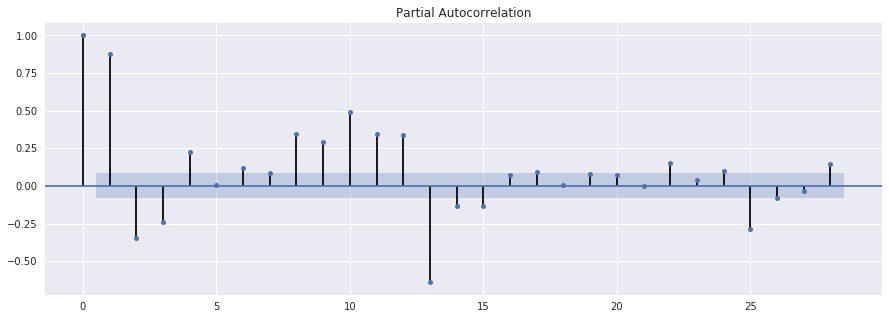

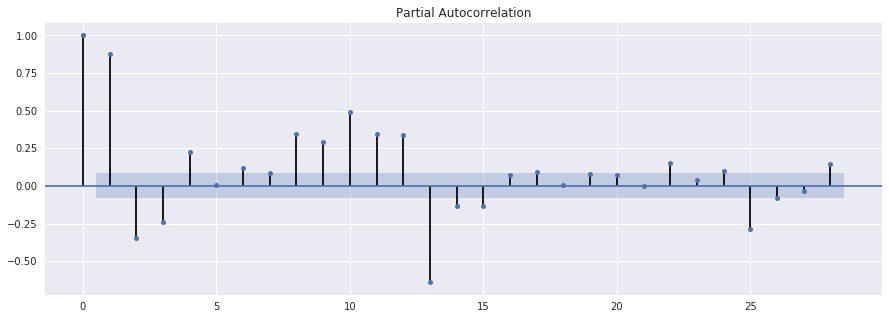

In [239]:
plot_pacf(candy)

### Ruido blanco
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

- Media constante
- Varianza constante
- Autocorrelación nula para cualquier lag

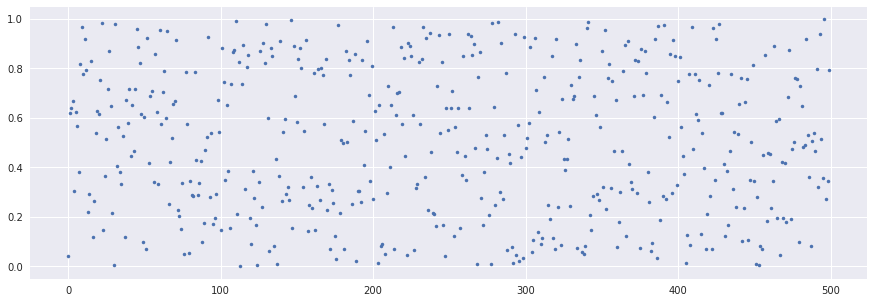

In [240]:
s = np.random.rand(500)
plt.plot(s,linestyle='',marker='.');

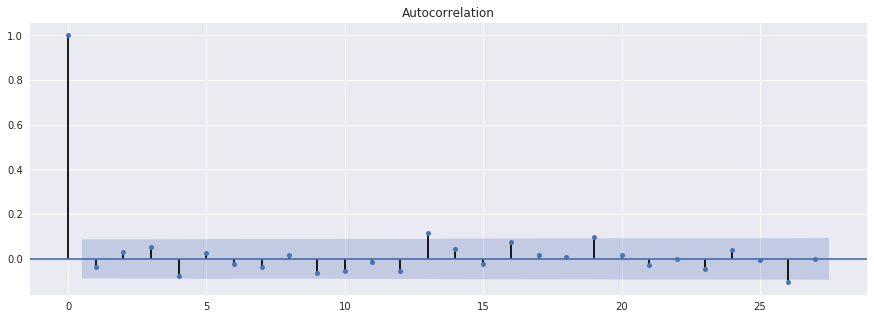

In [241]:
plot_acf(s);

# Modelos ARIMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

## El modelo Autorregresivo (AR)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<strong>R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + ... + a<sub>p</sub>.R<sub>t-p</sub> + &epsilon;<sub>t</sub></strong>

p: orden del modelo

AR(1): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + &epsilon;<sub>t</sub>

AR(2): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + &epsilon;<sub>t</sub>

AR(p): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + ... + a<sub>p</sub>.R<sub>t-p</sub> + &epsilon;<sub>t</sub>

Candy - AR(2):

In [243]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

##### Un modelo AR de orden p habrá que especificarlo en la funcion SARIMAX con un orden (p,0,0)

In [264]:
p=2
model=SARIMAX(candy, order=(p,0,0)).fit()

In [265]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:             production   No. Observations:                  548
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1965.427
Date:                Sat, 08 Feb 2020   AIC                           3936.854
Time:                        12:28:26   BIC                           3949.773
Sample:                    01-31-1972   HQIC                          3941.904
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2575      0.056     22.553      0.000       1.148       1.367
ar.L2         -0.2624      0.057     -4.638      0.000      -0.373      -0.152
sigma2        75.6479      3.187     23.739      0.000      69.402      81.894
===================================================================================
Ljung-Box (Q):                     1697.19   Jarque-Bera (JB):               125.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AIC y BIC
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Buscamos minimizar AIC y BIC

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Compara los valores de AIC y BIC para los modelos AR de orden 1 y 2 aplicados a candy.</div>
</div>

In [263]:
model_1=SARIMAX(candy,order=(1,0,0)).fit()
model_2=SARIMAX(candy,order=(2,0,0)).fit()
print(model_1.aic,model_2.aic)
print(model_1.bic,model_2.bic)

3973.6797722547726 3936.8543798817764
3982.2923228286686 3949.7732057426206


### Predicción
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [267]:
prediction=model.get_forecast(steps=24)

In [271]:
prediction.predicted_mean[:5]

2017-09    116.518645
2017-10    116.597866
2017-11    116.052706
2017-12    115.346361
2018-01    114.601152
Freq: M, dtype: float64

In [274]:
prediction.conf_int().head()

,lower production,upper production
2017-09,99.471696,133.565593
2017-10,89.208997,143.986735
2017-11,80.616458,151.488954
2017-12,73.289381,157.403342
2018-01,66.863888,162.338415


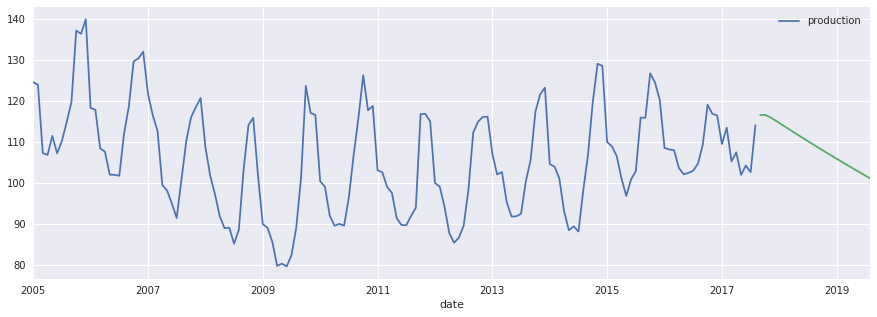

In [277]:
candy.truncate(before='2005').plot()
prediction.predicted_mean.plot()

Podemos acceder a los valores predichos para los datos en los que el modelo se ha entreado con el atributo .fittedvalues:

In [278]:
model.fittedvalues

date
1972-01      0.000000
1972-02     85.365009
1972-03     67.830866
1972-04     64.181334
1972-05     63.868445
              ...    
2017-04    102.551244
2017-05    107.485745
2017-06     99.980975
2017-07    104.295011
2017-08    101.664116
Freq: M, Length: 548, dtype: float64

Es posible calcular el error cuadrático medio -por ejemplo-:

In [279]:
from sklearn.metrics import mean_squared_error

In [280]:
mean_squared_error(candy.production, model.fittedvalues)

88.97417983698739

## El modelo Moving Average (MA)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<strong>R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + ... + m<sub>q</sub>.&epsilon;<sub>t-q</sub> + &epsilon;<sub>t</sub></strong>

p: orden del modelo:

MA(1): R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

MA(2): R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + &epsilon;<sub>t</sub>

MA(q): R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + ... + m<sub>p</sub>.&epsilon;<sub>t-p</sub> + &epsilon;<sub>t</sub>

Candy - MA(3):

##### Un modelo AR de orden p habrá que especificarlo en la funcion SARIMAX con un orden (0,0,q)

In [284]:
q=3
model=SARIMAX(candy,order=(0,0,q)).fit()

/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [285]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:             production   No. Observations:                  548
Model:               SARIMAX(0, 0, 3)   Log Likelihood               -2510.939
Date:                Sat, 08 Feb 2020   AIC                           5029.877
Time:                        12:35:50   BIC                           5047.102
Sample:                    01-31-1972   HQIC                          5036.610
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.9476      0.046     42.340      0.000       1.857       2.038
ma.L2          1.7465      0.068     25.843      0.000       1.614       1.879
ma.L3          0.6080      0.046     13.081      0.000       0.517       0.699
sigma2       553.5519     47.784     11.584      0.000     459.897     647.207
===================================================================================
Ljung-Box (Q):                     2272.02   Jarque-Bera (JB):                 2.17
Prob(Q):                              0.00   Prob(JB):                         0.34
Heteroskedasticity (H):               1.11   Skew:                             0.14
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [286]:
prediction = model.get_forecast(steps = 24)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

In [288]:
prediction.predicted_mean

2017-09    105.920000
2017-10     66.743404
2017-11     20.348293
2017-12      0.000000
2018-01      0.000000
2018-02      0.000000
2018-03      0.000000
2018-04      0.000000
2018-05      0.000000
2018-06      0.000000
2018-07      0.000000
2018-08      0.000000
2018-09      0.000000
2018-10      0.000000
2018-11      0.000000
2018-12      0.000000
2019-01      0.000000
2019-02      0.000000
2019-03      0.000000
2019-04      0.000000
2019-05      0.000000
2019-06      0.000000
2019-07      0.000000
2019-08      0.000000
Freq: M, dtype: float64

In [289]:
prediction.conf_int()

,lower production,upper production
2017-09,59.806587,152.033413
2017-10,-34.213870,167.700679
2017-11,-108.797198,149.493784
2017-12,-132.153813,132.153813
2018-01,-132.153813,132.153813
2018-02,-132.153813,132.153813
2018-03,-132.153813,132.153813
2018-04,-132.153813,132.153813
2018-05,-132.153813,132.153813
2018-06,-132.153813,132.153813


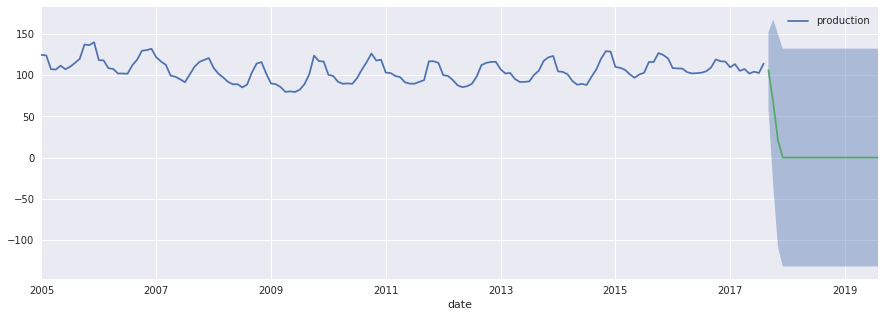

In [290]:
fig, ax = plt.subplots()
candy.truncate(before = "2005").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

## El modelo ARMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

ARMA(1, 1): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + m<sub>1</sub>.&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

ARMA(p, q): AR(p): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + a<sub>p</sub>.R<sub>t-p</sub> + R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&

Candy - ARMA(2, 3):

In [291]:
model=SARIMAX(candy,order=(2,0,3)).fit()
model.summary()

/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:             production   No. Observations:                  548
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -1912.744
Date:                Sat, 08 Feb 2020   AIC                           3837.488
Time:                        12:41:09   BIC                           3863.326
Sample:                    01-31-1972   HQIC                          3847.587
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -8.313e-05      0.000     -0.255      0.799      -0.001       0.001
ar.L2          0.9998      0.000   3040.788      0.000       0.999       1.000
ma.L1          1.3949      0.048     29.319      0.000       1.302       1.488
ma.L2          0.5739      0.071      8.104      0.000       0.435       0.713
ma.L3          0.1747      0.044      3.936      0.000       0.088       0.262
sigma2        61.9381      3.360     18.432      0.000      55.352      68.524
===================================================================================
Ljung-Box (Q):                     1212.36   Jarque-Bera (JB):                49.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [292]:
prediction = model.get_forecast(steps = 12)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

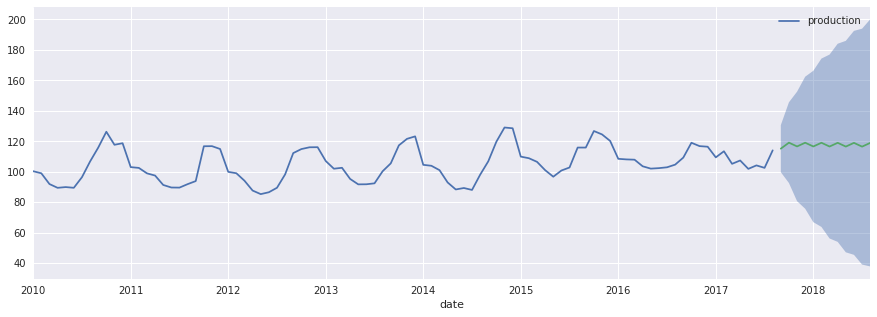

In [293]:
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

## Series estacionarias (stationary series)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Para que sea una serie estacionaria:
- Media es 0
- Varianza constante
- Autocorrelación nula

Como eso no puede ser porque nunca se da el caso, la definición que se da es:
- Media más o menos constante
- Varianza mas o menos constante
- Puede haber una cierta periodicidad

Si no es estacionario no se le puede aplicar ARIMA.

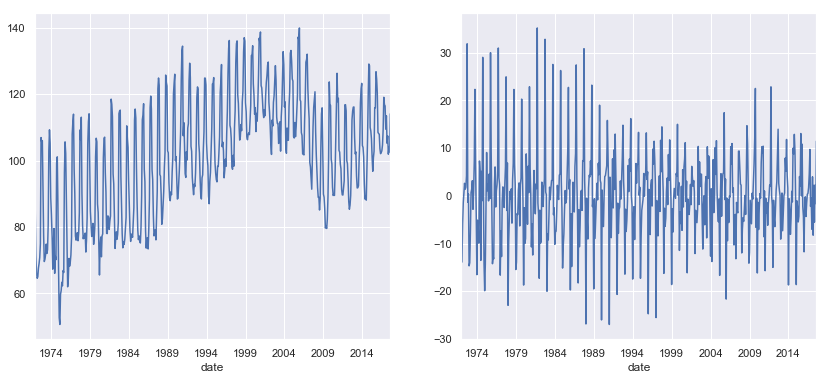

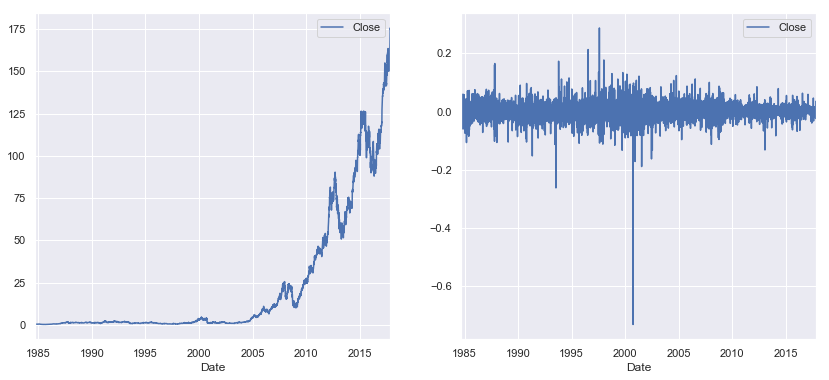

### El test de Dicky-Fuller Aumentado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Comprueba si nuestros datos tienen una cierta tendencia. El test tiene como hipotesis nula que nuestros datos NO SON estacionarios

In [295]:
from statsmodels.tsa.stattools import adfuller

In [300]:
adfuller(candy['production'])

(-1.887049811225278,
 0.3381775973004303,
 14,
 533,
 {'1%': -3.442678467240966,
  '5%': -2.8669778698997543,
  '10%': -2.5696661916864083},
 3012.7890909742596)

El p-valor es el segundo valor (0.33817.....)

In [302]:
candy_diff=candy.diff()
candy_diff

,production
date,
1972-01,NaN
1972-02,-13.8745
1972-03,-5.7971
1972-04,-1.4584
1972-05,0.4455
...,...
2017-04,2.2043
2017-05,-5.5079
2017-06,2.2813


Habrá que quitar el NaN ya que sino adfuller no funcionará. 

In [319]:
candy_diff.drop(candy_diff.index[0],inplace=True)

In [320]:
adfuller(candy_diff['production'])

(-6.119511504715785,
 8.925584203568732e-08,
 13,
 533,
 {'1%': -3.442678467240966,
  '5%': -2.8669778698997543,
  '10%': -2.5696661916864083},
 3009.6697664167204)

In [324]:
model=SARIMAX(candy_diff,order=(2,0,3)).fit()

In [325]:
prediction=model.get_forecast(24)

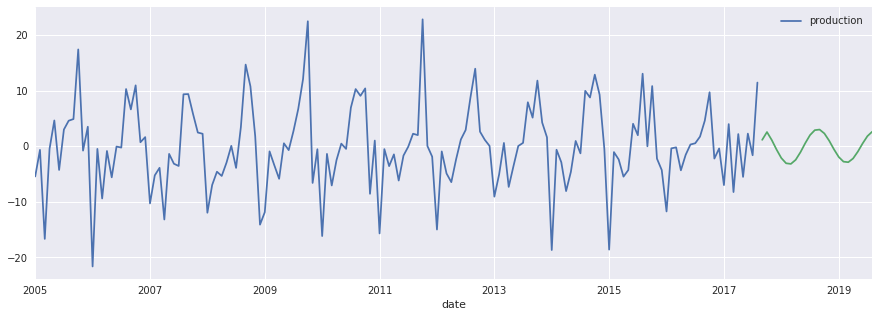

In [329]:
candy_diff.truncate(before='2005').plot()
prediction.predicted_mean.plot()
plt.show()

Como hemos estado calculando LAS DIFERENCIAS, habrá que deshacer ese cambio para poder obtener las predicciones reales

In [333]:
real_predictions=np.cumsum(prediction.predicted_mean)+candy.iloc[-1].values

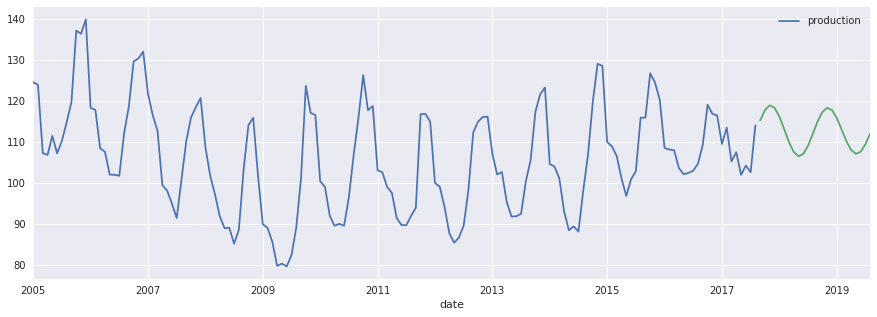

In [334]:
candy.truncate(before='2005').plot()
real_predictions.plot()
plt.show()

### Transformaciones
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

###### Diferencia

###### Porcentaje de cambio

Apliquémoslo al dataset AirPassengers.csv.

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Carga el dataset AirPassengers.csv, aplica el método visto y pásale el test de Dicky-Fuller aumentado ¿es estacionario?</div>
</div>

In [351]:
air=pd.read_csv('AirPassengers.csv',parse_dates=['Month'])
air.rename({'#Passengers':'Passengers'},axis=1,inplace=True)
air.set_index('Month',inplace=True)
air.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


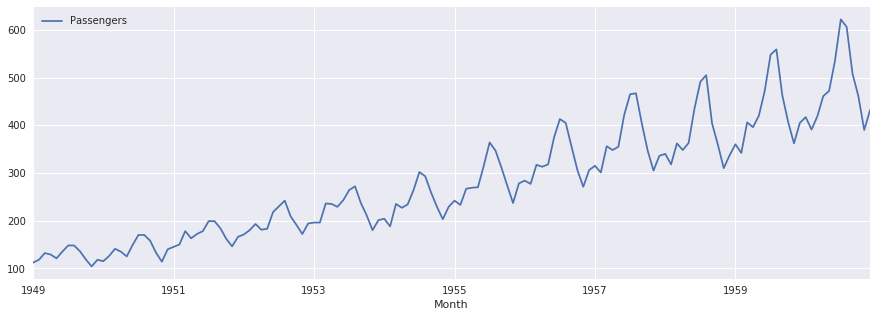

In [352]:
air.plot();

In [353]:
adfuller(air['Passengers'])

(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [354]:
air_pct=air.pct_change()
air_pct.head()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,0.053571
1949-03-01,0.118644
1949-04-01,-0.022727
1949-05-01,-0.062016


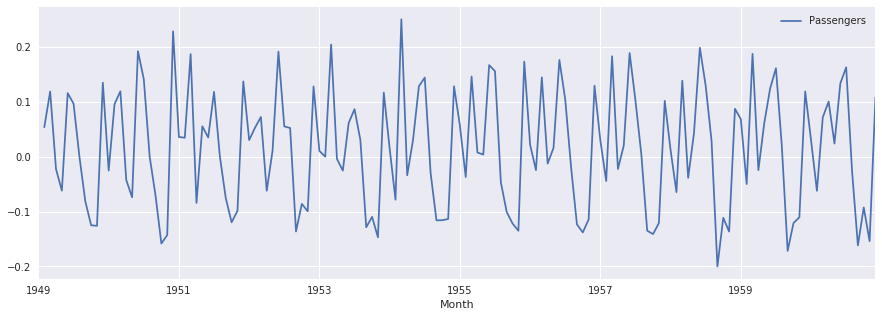

In [355]:
air_pct.plot()

###### Logaritmo

In [408]:
air_log=np.log(air)
air_log.head()

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


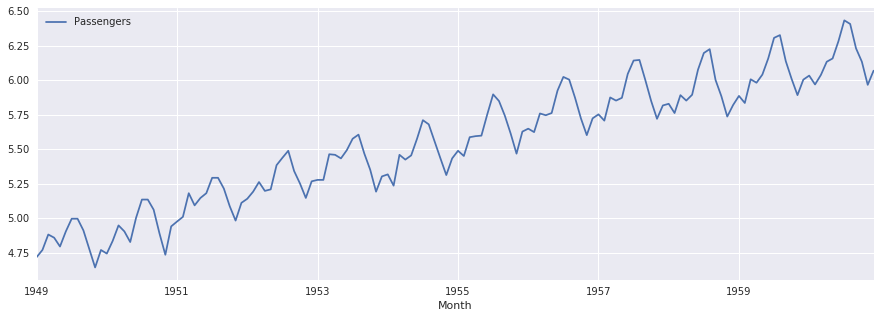

In [409]:
air_log.plot()

In [410]:
adfuller(air_log['Passengers'])

(-1.717017089106963,
 0.4223667747703902,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

###### Otras funciones

###### Funciones combinadas

air_passengers + log + diff

In [361]:
air_diff_log=np.log(air).diff()
air_diff_log.drop(air_diff_log.index[0],inplace=True)

In [362]:
adfuller(air_diff_log['Passengers'])

(-2.717130598388118,
 0.07112054815086118,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568094)

### Integración
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

## Perfiles de los datos AR y MA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [363]:
from statsmodels.tsa.arima_process import arma_generate_sample

Los coeficientes DE AR habrá que ponerlos en valor negativo (es el segundo valor), los de MA se ponen positivos. Además el primer valor indica el orden del modelo. El primer corchete es el AR y el segundo el MA

In [366]:
sample=arma_generate_sample([1,-.7],[1,0],1000)

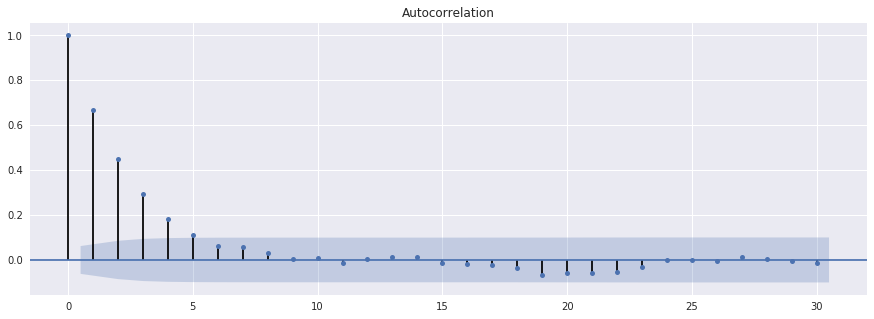

In [369]:
plot_acf(sample);

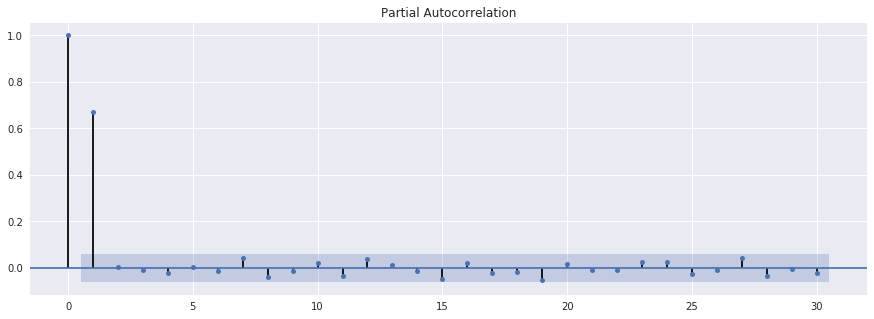

In [370]:
plot_pacf(sample);

#### En las gráficas de arriba, se observa que el PACF nos indica que es una función AR 1 ya que SOLAMENTE DEPENDE DEL ANTERIOR. Se ve claramente en el gráfico. En el ACF se ve que la autocorrelación tiende a 0 según se va alejando

In [397]:
sample=arma_generate_sample([2,-0.9,1.5],[1,0],1000)

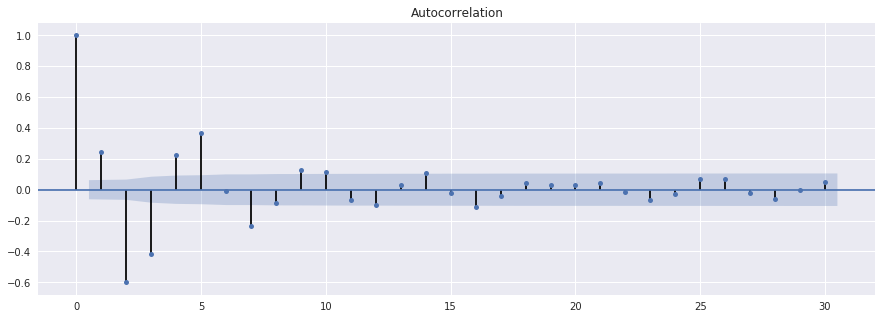

In [398]:
plot_acf(sample);

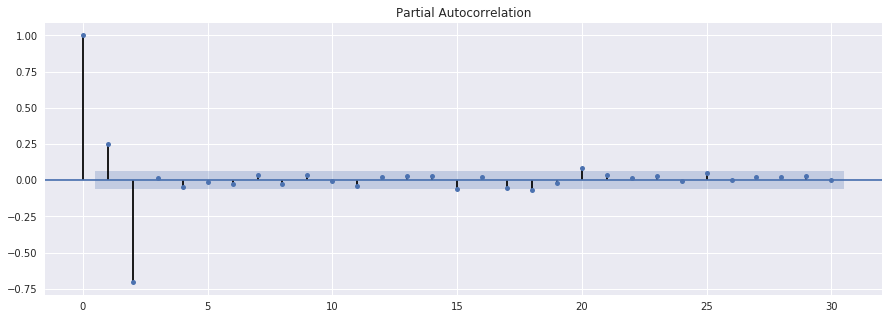

In [399]:
plot_pacf(sample);

In [403]:
sample=arma_generate_sample([1,0],[1,0.7],1000)

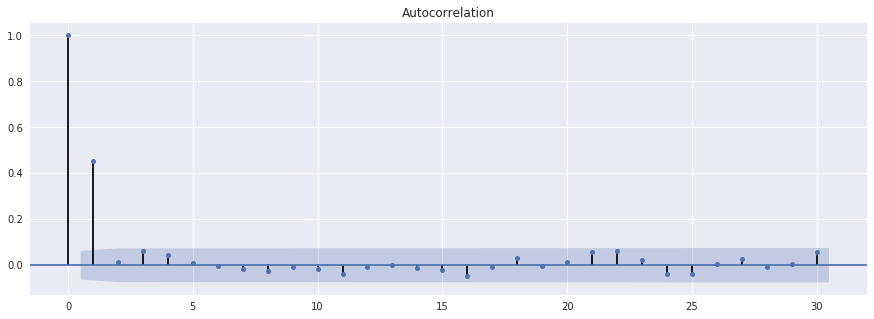

In [404]:
plot_acf(sample);

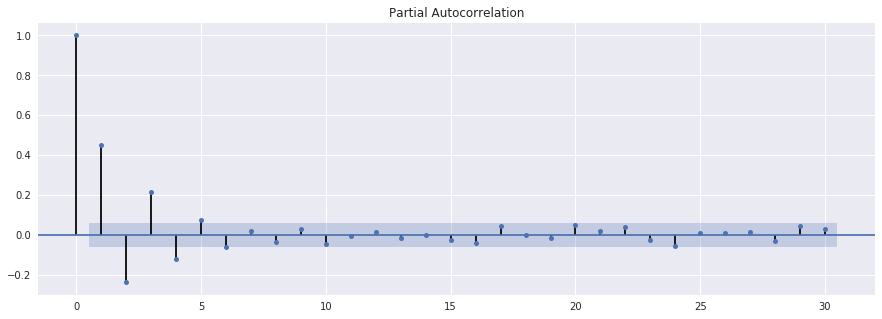

In [405]:
plot_pacf(sample);

#### Para los MA ocurre al revés. Nos importa más ver que en el ACF solo hay correlación en 1 valor, ya que la autocorrelación DE ERRORES se da solo con el primer lag (MA 1). 

### Datos AR
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra la funciones de autocorrelación y de autocorrelación parcial para datos de un modelo AR(2)</div>
</div>

### Datos MA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra la funciones de autocorrelación y de autocorrelación parcial para datos de un modelo MA(2)</div>
</div>

## El modelo ARIMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Candy - ARIMA(3, 1, 2) -> AR3, 1 diferenciación (diff), MA2

In [411]:
model=SARIMAX(candy,order=(3,1,2)).fit()

In [412]:
prediction = model.get_forecast(steps = 24)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

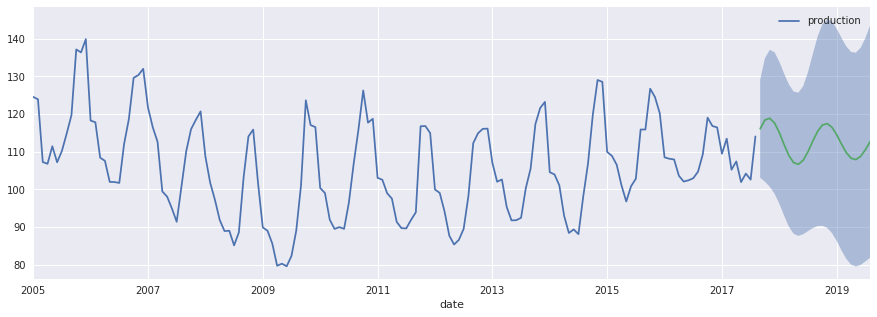

In [413]:
fig, ax = plt.subplots()
candy.truncate(before = "2005").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

## El modelo ARMAX
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

ARMA(1,1): y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + m<sub>1</sub>&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

ARMAX(1,1): y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + m<sub>1</sub>&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub> + x<sub>1</sub>z<sub>t</sub>

In [414]:
ventas = pd.Series([10, 22, 15, 10, 25, 30, 18])

In [415]:
festivos = pd.Series([1, 0, 0, 0, 0, 1, 1])

In [416]:
model=SARIMAX(ventas,order=(2,0,1),exog=festivos).fit()

/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [421]:
prediction=model.get_forecast(steps=2,exog=pd.DataFrame([0,0]))

In [422]:
lower = prediction.conf_int()["lower y"]
upper = prediction.conf_int()["upper y"]

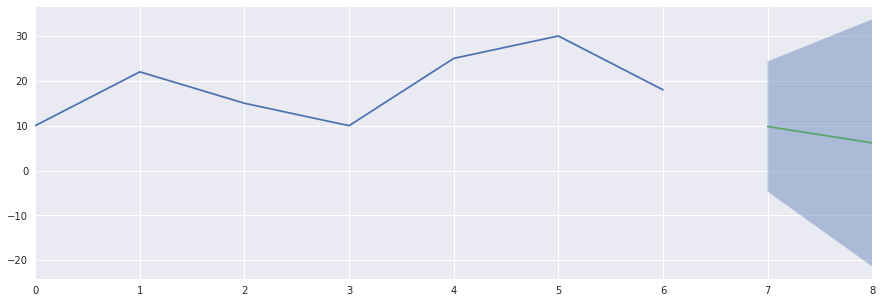

In [423]:
fig, ax = plt.subplots()
ventas.plot(ax = ax)
prediction.predicted_mean.plot(ax = ax, label = "Forecast")
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Repite el ejercicio suponiendo que ambos días van a ser festivos</div>
</div>

## Búsqueda en bucle del mejor modelo
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [424]:
best_aic = 999999
for p in range(4):
    for q in range(4):
        for d in range(2):
            try:
                model = SARIMAX(candy, order = (p, d, q)).fit()
                if model.aic < best_aic:
                    best_aic = model.aic
                    print(p, d, q, model.aic, model.bic)
            except:
                pass

0 0 0 6628.977256015899 6633.283531302847
0 1 0 3960.6789418402914 3964.9833906427134


/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 1 1 3934.649407427257 3943.258305032101
0 1 2 3887.9414434005307 3900.854789807797
0 1 3 3856.0767774320498 3873.294572641738


/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1 1 3 3785.1236498120174 3806.645893824127


/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 3 3638.4694485362907 3664.2961413508224


/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 1 3 3557.960529283436 3588.0916709003895


/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## Descomposición de una serie estacional
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

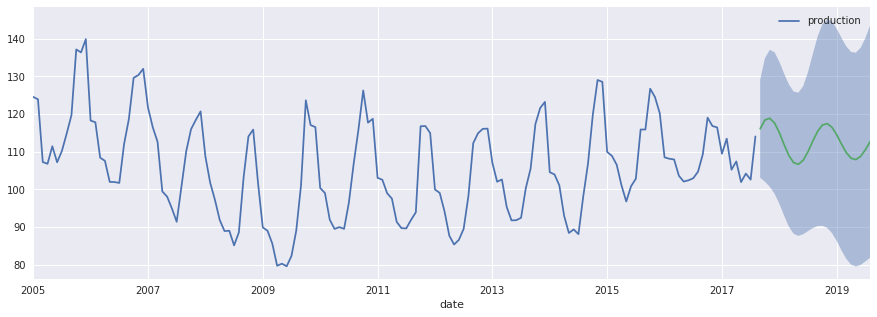

In [425]:
model = SARIMAX(candy, order = (3, 1, 2)).fit()
prediction = model.get_forecast(steps = 24)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]
fig, ax = plt.subplots()
candy.truncate(before = "2005").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

In [428]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [429]:
components = seasonal_decompose(candy.to_timestamp())

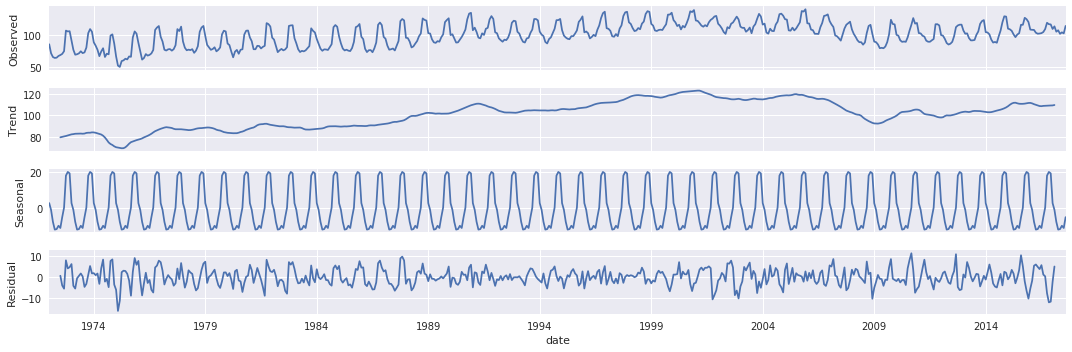

In [431]:
components.plot();

## El modelo SARIMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ARIMA(2, 0, 1):&nbsp;&nbsp;&nbsp;y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + a<sub>2</sub>y<sub>t-2</sub> + m<sub>1</sub>&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

SARIMA(0, 0, 0)(2, 0, 1)<sub>7</sub>:&nbsp;&nbsp;&nbsp;y<sub>t</sub> = a<sub>7</sub>y<sub>t-7</sub> + a<sub>14</sub>y<sub>t-14</sub> + m<sub>7</sub>&epsilon;<sub>t-7</sub> + &epsilon;<sub>t</sub>

model = SARIMAX(dataframe, order = (p, i, q), seasonal_order = (P, I, Q, S), trend = "c")

Convendrá convertir el índice del dataframe a timestamp para evitar problemas con la función plot_diagnostics...

Candy - SARIMA(3,1,2)(1, 1, 2, 12):

In [440]:
model=SARIMAX(candy.to_timestamp(),order=(3,1,2),seasonal_order=(1,1,2,12)).fit()

/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [441]:
prediction = model.get_forecast(steps = 24)

In [442]:
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

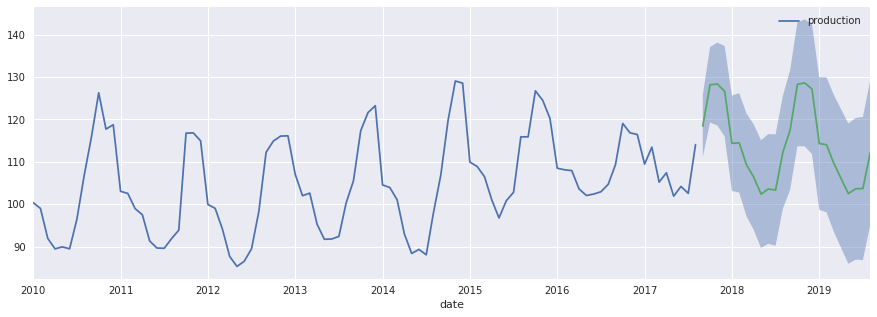

In [443]:
candy.truncate(before = "2010").plot()
prediction.predicted_mean.plot()
plt.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

## Diagnóstico del modelo
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [444]:
model.resid.head()

date
1972-01-01    85.694500
1972-02-01   -13.874292
1972-03-01    -5.797061
1972-04-01    -1.458528
1972-05-01     0.445557
Freq: MS, dtype: float64

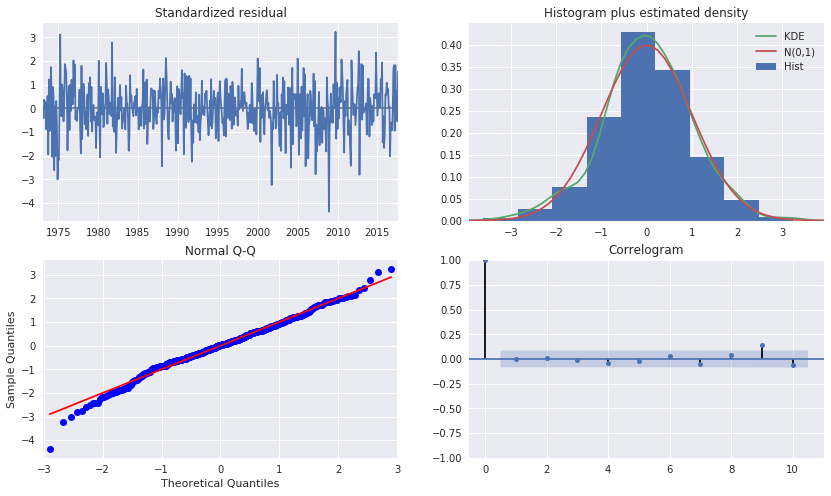

In [445]:
model.plot_diagnostics(figsize = (14, 8))
plt.show()

In [446]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         production   No. Observations:                  548
Model:             SARIMAX(3, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -1466.780
Date:                            Sat, 08 Feb 2020   AIC                           2951.561
Time:                                    13:56:47   BIC                           2990.101
Sample:                                01-01-1972   HQIC                          2966.640
                                     - 08-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2115      0.281      0.753      0.452      -0.339       0.762
ar.L2          0.3559      0.197      1.809      0.070      -0.030       0.741
ar.L3          0.1679      0.049      3.460      0.001       0.073       0.263
ma.L1         -0.5107      0.284     -1.801      0.072      -1.067       0.045
ma.L2         -0.4388      0.265     -1.653      0.098      -0.959       0.081
ar.S.L12      -0.0013      0.425     -0.003      0.998      -0.834       0.831
ma.S.L12      -0.6383      0.421     -1.516      0.130      -1.464       0.187
ma.S.L24      -0.1082      0.302     -0.359      0.720      -0.700       0.483
sigma2        13.8135      0.710     19.467      0.000      12.423      15.204
===================================================================================
Ljung-Box (Q):                       80.35   Jarque-Bera (JB):                26.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -0.25
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Automatización del cálculo de los órdenes óptimos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [450]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.9MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [451]:
import pmdarima as pm

http://alkaline-ml.com/pmdarima/1.0.0/modules/generated/pmdarima.arima.auto_arima.html

In [452]:
model = pm.auto_arima(
    candy,
    m = 12,
    suppress_warnings=True
)

In [453]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  548
Model:             SARIMAX(1, 1, 2)x(2, 0, 1, 12)   Log Likelihood               -1511.361
Date:                            Sat, 08 Feb 2020   AIC                           3038.721
Time:                                    14:00:54   BIC                           3073.157
Sample:                                         0   HQIC                          3052.182
                                            - 548                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.747e-05      0.000      0.155      0.877      -0.000       0.001
ar.L1          0.8526      0.040     21.083      0.000       0.773       0.932
ma.L1         -1.1535      0.062    -18.693      0.000      -1.274      -1.033
ma.L2          0.1754      0.055      3.182      0.001       0.067       0.283
ar.S.L12       1.1610      0.053     22.066      0.000       1.058       1.264
ar.S.L24      -0.1662      0.052     -3.202      0.001      -0.268      -0.064
ma.S.L12      -0.7873      0.037    -21.465      0.000      -0.859      -0.715
sigma2        13.9466      0.711     19.624      0.000      12.554      15.340
===================================================================================
Ljung-Box (Q):                       97.25   Jarque-Bera (JB):                33.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.18
Prob(H) (two-sided):                  0.28   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

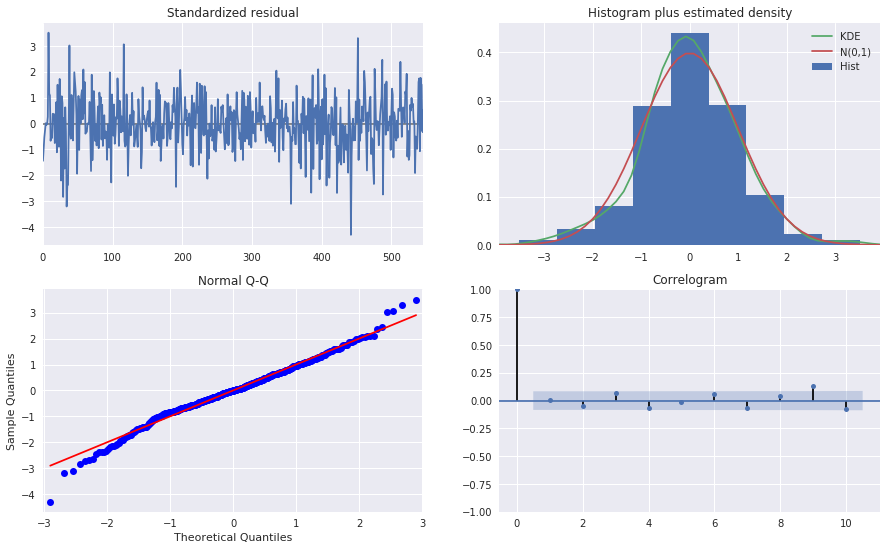

In [454]:
fig = model.plot_diagnostics()
fig.set_size_inches(15, 9)
plt.show()

In [455]:
forecast_mean, conf_int = model.predict(24, return_conf_int = True)

In [456]:
forecast_lower = conf_int[:, 0]
forecast_upper = conf_int[:, 1]

In [457]:
dates = pd.period_range(start = candy.index[-1], periods = 25, freq = "M")[1:]
dates

PeriodIndex(['2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
             '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08'],
            dtype='period[M]', freq='M')

In [458]:
forecast = pd.Series(forecast_mean, index = dates)

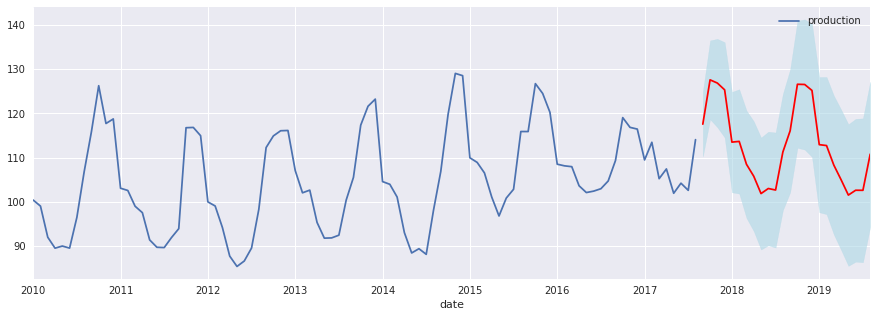

In [459]:
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
forecast.plot(ax = ax, color = "red")
plt.fill_between(dates, forecast_lower, forecast_upper, color = "lightblue", alpha = 0.6)
plt.show()